<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/OCR_usingTesseract_Detect_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Detecting sentiments of a quote

Love knows no gender and the LGBTQ (Lesbian, Gay, Bisexual, Transgender, and Queer) community is the epitome of this thought. In honor of Pride Month, we are here with another Machine Learning challenge, in association with Pride Circle, to celebrate the impact and changes that they made globally.

You have been appointed as a social media moderator for your firm. Your key responsibility is to tag and categorize quotes that are uploaded during Pride Month on the basis of its sentiment—

* positive, 
* negative, and 
* random. 


Your task is to build a sophisticated Machine Learning model combining Optical Character Recognition (OCR) and Natural Language Processing (NLP) to assess sentiments of these quotes.

# Dataset

The dataset consists of quotes that are uploaded during Pride Month.

The benefits of practicing this problem by using unsupervised Machine Learning techniques are as follows:

* This challenge encourages you to apply your unsupervised Machine Learning skills to build models that can assess sentiments of a quote.

* This challenge helps you enhance your knowledge of OCR and NLP that are a part of the advanced fields of Machine Learning and artificial intelligence.

* You are required to build a model that analyzes sentiments of a quote and classifies them into positive, negative, or random.

# Task
Your task is to build an engine that combines the concepts of OCR and NLP that accepts a .jpg file as input, extracts the text, if any, and classifies sentiment as positive or negative. If the text sentiment is neutral or an image file does not have any text, then it is classified as random.

# Evaluation Criteria

score = 100*(recall_score(actual_values,Predicted_values))

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/drive/My Drive/Detect_Sentiments/Data Files/Sample Data Files/Sample_Negative.jpg'))

In [ ]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/drive/My Drive/Detect_Sentiments/Data Files/Sample Data Files/Sample_Positive.jpg'))

In [ ]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/drive/My Drive/Detect_Sentiments/Data Files/Dataset/Test206.jpg'))

In [ ]:
print(extractedInformation.split(" "))

['Of', 'course', 'gay', 'men\n\ndress', 'well.', 'They', "didn't\nspend", 'all', 'that', 'time', 'in\nthe', 'closet', 'doing', 'nothing.\n\nee', 'Being', 'Gay', '&', 'Proud', 'Quotes\nwww.', 'geckoandfly.', 'com']


In [ ]:
text = extractedInformation.encode('utf-8')

In [ ]:
type(extractedInformation),type(text)

(str, bytes)

In [ ]:
from textblob import TextBlob
TextBlob(extractedInformation).sentiment

Sentiment(polarity=0.5444444444444444, subjectivity=0.7222222222222223)

In [ ]:
converted_list = []

for element in extractedInformation.split(" "):
    converted_list.append(element.replace("\n",""))

In [ ]:
" ".join(converted_list)

"Of course gay mendress well. They didn'tspend all that time inthe closet doing nothing.ee Being Gay & Proud Quoteswww. geckoandfly. com"

In [ ]:
path_train = '/content/drive/My Drive/Detect_Sentiments/Data Files/Dataset'

In [ ]:
from textblob import TextBlob
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
import os
img_txt =[]
image_name = []
polarity =  []
for images in os.listdir(path_train):
  extractedInformation = pytesseract.image_to_string(Image.open(path_train+'/'+ images))
  text = extractedInformation.encode('utf-8')
  converted_list = []
  for element in extractedInformation.split(" "):
    converted_list.append(element.replace("\n",""))
  img_txt.append(" ".join(converted_list))
  polarity.append(detect_polarity(extractedInformation))
  image_name.append(images)





In [ ]:
import pandas as pd
train_df = pd.DataFrame({'Image':image_name,'text':img_txt,'polarity':polarity})

In [ ]:
train_df.head()

,Image,text,polarity
0,Test1902.jpg,Se aCe en asCard———],0.0
1,Test1992.jpg,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,0.0
2,Test2411.jpg,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,0.0
3,Test3118.jpg,A KEEP CALMAND LOVEWHO YOU WANTior,0.4
4,Test3130.jpg,Fagms. id2ato be norm.!you will never knowea S...,0.0


In [ ]:
train_df[train_df['polarity'] < 0].head()

,Image,text,polarity
13,Test1785.jpg,To be afraid isBSR tale el)if the truth wereno...,-0.387500
30,Test2792.jpg,Se ee eePree cae Rettrece ohne)Ceo et ec)Cee e...,-0.166667
62,Test1884.jpg,Pura ould say}judicrous. mee icnairrational. i...,-0.083333
93,Test516.jpg,THERE'S NOTHINGWRONG WITH YOU.THERE'S ALO,-0.500000
99,Test614.jpg,| learnedcompassion frombeing discriminatedaga...,-0.700000


In [ ]:
train_df.tail()

,Image,text,polarity
234,Test228.jpg,,0.0
235,Test225.jpg,,0.0
236,Test143.jpg,,0.0
237,Test160.jpg,,0.0
238,Test236.jpg,,0.0


In [ ]:
def filltext(text):
  if text =='':
    return 'no text'
  else:
    return text

In [ ]:
train_df['text']  = train_df['text'].apply(lambda x : filltext(x))

In [ ]:
train_df[train_df['Image'] == 'Test206.jpg']

,Image,text,polarity
181,Test206.jpg,Bote Verses aganstde verses agars! homosemuali...,0.520833


In [ ]:
homophobic_words = ['gay','homosexual','lesbian','closeted','flammer','faggot','homo','lgbt','bisexual','sassy','homophobia','lgbtqia','mlm','pansexual']

In [ ]:
def detect_category(val):
    if val > 0 :
      return 'Positive'
    elif val < 0:
      return 'Negative'
    else:
      return 'Random'

In [ ]:
train_df['category'] = train_df['polarity'].apply(detect_category)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


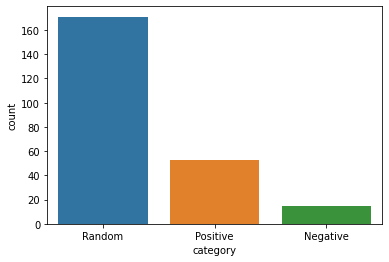

In [ ]:
import seaborn as sns
sns.countplot(train_df['category'])

In [ ]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
train_df.head()

,Image,text,polarity,category
0,Test1902.jpg,Se aCe en asCard———],0.0,Random
1,Test1992.jpg,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,0.0,Random
2,Test2411.jpg,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,0.0,Random
3,Test3118.jpg,A KEEP CALMAND LOVEWHO YOU WANTior,0.4,Positive
4,Test3130.jpg,Fagms. id2ato be norm.!you will never knowea S...,0.0,Random


In [ ]:
data = train_df[['text','category']].copy()

In [ ]:
data.tail()

,text,category
234,no text,Random
235,no text,Random
236,no text,Random
237,no text,Random
238,no text,Random


In [ ]:
#!pip install texthero

In [ ]:
pip install config

In [ ]:
import texthero as hero


In [ ]:
data['clean_text'] = hero.clean(data['text'])

In [ ]:
data.head()

,text,category,clean_text
0,Se aCe en asCard———],Random,se ace en ascard
1,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,Random,colt ngsteaight basterainbow
2,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,Random,one daywon come ofthe clowe ju veps ty l beall...
3,A KEEP CALMAND LOVEWHO YOU WANTior,Positive,keep calmand lovewho wantior
4,Fagms. id2ato be norm.!you will never knowea S...,Random,fagms id2ato norm never knowea seareaie oesa chia


In [ ]:
from texthero import preprocessing
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]

In [ ]:
#pass the custom_pipeline to the pipeline argument
data['clean_text'] = hero.clean(data['text'], pipeline = custom_pipeline)
data.head()

,text,category,clean_text
0,Se aCe en asCard———],Random,se ace en ascard
1,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,Random,colt ngsteaight basterainbow
2,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,Random,one daywon come ofth clow ju vep ty l beall ma...
3,A KEEP CALMAND LOVEWHO YOU WANTior,Positive,keep calmand lovewho wantior
4,Fagms. id2ato be norm.!you will never knowea S...,Random,fagm id2ato norm never knowea seareai oesa chia


In [ ]:
tw = hero.visualization.top_words(data['clean_text']).head(10)
import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

text     111
gay       30
ee        14
peopl     10
proud     10
Name: clean_text, dtype: int64

In [ ]:
#Add pca value to dataframe to use as visualization coordinates
df = data.copy()
df['pca'] = (
            df['clean_text']
            .pipe(hero.tfidf)
            .pipe(hero.pca)
   )
#Add k-means cluster to dataframe 
df['kmeans'] = (
            df['clean_text']
            .pipe(hero.tfidf)
            .pipe(hero.kmeans)
   )
df.head()

,text,category,clean_text,pca,kmeans
0,Se aCe en asCard———],Random,se ace en ascard,"[-0.46694440363381146, -0.03681018650884662]",0
1,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,Random,colt ngsteaight basterainbow,"[-0.4620957987377668, -0.05421095819806234]",0
2,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,Random,one daywon come ofth clow ju vep ty l beall ma...,"[-0.46732550398398814, -0.028501251083103467]",0
3,A KEEP CALMAND LOVEWHO YOU WANTior,Positive,keep calmand lovewho wantior,"[-0.4644112395037997, -0.041984719559498423]",0
4,Fagms. id2ato be norm.!you will never knowea S...,Random,fagm id2ato norm never knowea seareai oesa chia,"[-0.46209579873771517, -0.053279667334234254]",0


In [ ]:
#generate scatter plot
hero.scatterplot(df, 'pca', color = 'kmeans', hover_data=['text'] )

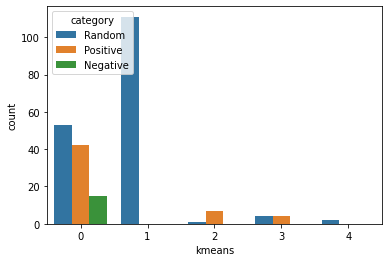

In [ ]:
sns.countplot(x='kmeans',data=df,hue='category')

In [ ]:
df[df['kmeans']==3]

,text,category,clean_text,pca,kmeans
17,rycoonPoe eee eesWe gp,Random,rycoonpo eee eesw gp,"[-0.46587045608829397, 0.007188664441297903]",3
19,Being gay is like beingleft handed. Some peopl...,Positive,gay like beingleft hand peoplear peopl tfete e...,"[-0.49092541645474247, 0.6421025466868687]",3
63,"“Onstage, | am a devil. But I'm hardly asocial...",Positive,onstag devil hard asoci reject eee ae,"[-0.46789097200216784, -0.005458264586320484]",3
72,Slowlerukectioeesrema’eesa elenaaaereene tersp...,Positive,slowlerukectioeesremaeesa elenaaaereen terspeo...,"[-0.4647282805039732, -0.015752013559181797]",3
73,ee)totheDeteve big events such as the Finalhoh...,Random,ee tothedetev big event finalhoh eskonmsndeeleeda,"[-0.467606991416649, 0.020661874134978376]",3
123,Being gay is like beingleft handed. Some peopl...,Positive,gay like beingleft hand peoplear peopl tfete e...,"[-0.49092541645474247, 0.6421025466868687]",3
157,"UE are)be overwhelming-to keep secrets,4 SE AC...",Random,ue overwhelm keep secret se acr ecr adeepc e e...,"[-0.47412441795468774, 0.029823539342979773]",3
212,eSP >,Random,esp,"[-0.4620957987377043, -0.05384011110207666]",3


In [ ]:
df[df['kmeans']==4]

,text,category,clean_text,pca,kmeans
94,SOUNDS,Random,sound,"[-0.47003186323853, -0.13630449628583266]",4
117,SOUNDS,Random,sound,"[-0.47003186323853, -0.13630449628583266]",4


In [ ]:
df[df['kmeans']==2]

,text,category,clean_text,pca,kmeans
34,"Zeigler, author of ""Fair Play: How LGBT Athlet...",Positive,zeigler author fair play lgbt athlet claim the...,"[-0.4792248146746869, 0.055467046184564085]",2
39,"‘Zeigler, author of ""Fair Play: How LGBT Athle...",Positive,zeigler author fair play lgbt athlet claim the...,"[-0.4789521934078539, 0.05716780632240579]",2
107,We are legal!!! In all fifty states!!!,Positive,legal fifti state,"[-0.4720119638705174, -0.16599829600592086]",2
140,Gay pride or LGBT pride is the positive stance...,Positive,gay pride lgbt pride posit stanc againstdiscri...,"[-0.47507524620584113, 0.10078826606056766]",2
148,We are legal!!! In all fifty states!!!,Positive,legal fifti state,"[-0.4720119638705174, -0.16599829600592086]",2
162,Irased on or was the outcome of the perception...,Positive,iras outcom percept attitud audienc toward the...,"[-0.4697853591635277, -0.044712572600874204]",2
204,Anti-Bullying: States that have laws prohibiti...,Positive,anti bulli state law prohibit bulli student on...,"[-0.46614486941739314, -0.07949251782424278]",2
217,Anti-LGBT: States that have laws restricting t...,Random,anti lgbt state law restrict teacher staff fro...,"[-0.46881137727077354, -0.07428721607305404]",2


In [ ]:
df[df['kmeans']==1]

,text,category,clean_text,pca,kmeans
5,no text,Random,text,"[0.5390438266653736, 0.0007941427927522107]",1
6,no text,Random,text,"[0.5390438266653736, 0.0007941427927522142]",1
7,no text,Random,text,"[0.5390438266653736, 0.0007941427927522083]",1
8,no text,Random,text,"[0.5390438266653736, 0.0007941427927522015]",1
9,no text,Random,text,"[0.5390438266653736, 0.000794142792752215]",1
...,...,...,...,...,...
234,no text,Random,text,"[0.5390438266653736, 0.0007941427927522079]",1
235,no text,Random,text,"[0.5390438266653736, 0.0007941427927522079]",1
236,no text,Random,text,"[0.5390438266653736, 0.0007941427927522079]",1
237,no text,Random,text,"[0.5390438266653736, 0.0007941427927522079]",1


In [ ]:
df[df['kmeans']==0]

,text,category,clean_text,pca,kmeans
0,Se aCe en asCard———],Random,se ace en ascard,"[-0.46694440363381146, -0.03681018650884662]",0
1,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,Random,colt ngsteaight basterainbow,"[-0.4620957987377668, -0.05421095819806234]",0
2,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,Random,one daywon come ofth clow ju vep ty l beall ma...,"[-0.46732550398398814, -0.028501251083103467]",0
3,A KEEP CALMAND LOVEWHO YOU WANTior,Positive,keep calmand lovewho wantior,"[-0.4644112395037997, -0.041984719559498423]",0
4,Fagms. id2ato be norm.!you will never knowea S...,Random,fagm id2ato norm never knowea seareai oesa chia,"[-0.46209579873771517, -0.053279667334234254]",0
...,...,...,...,...,...
215,BITCHGHETTOILLEGAL ALIENNO HOMORETARDED & LAME...,Negative,bitchghettoilleg alienno homoretard lamethat g...,"[-0.46209579873770806, -0.05438858456508503]",0
218,Few Say Being LGRT Is 4 NegativeFactor in Thei...,Negative,say lgrt negativefactor thei titeey es aaltepe...,"[-0.46522915473062126, -0.05104996135049973]",0
224,JasonJ &jaybs121|4| =@) Added Me Everyone add ...,Positive,jasonj jaybs121 ad everyon add newsnapchat com...,"[-0.46751267745291597, 0.03893183059533847]",0
225,“You either say how you feel and fuckit up or ...,Negative,either say feel fuckit say noth let fuck instead,"[-0.47289554921849986, -0.038547291261093804]",0


In [ ]:
def target(k):
  if k == 1 or k ==4:
    return 'Random'
  elif k ==0 :
    return 'Positive'
  else:
    return 'Negative'
df['target'] = df['kmeans'].apply(lambda x : target(x))

In [ ]:
df.head()

,text,category,clean_text,pca,kmeans,target
0,Se aCe en asCard———],Random,se ace en ascard,"[-0.46694440363381146, -0.03681018650884662]",0,Positive
1,Colt) NGSTEAIGHT'Y BASTERAINBOW’a,Random,colt ngsteaight basterainbow,"[-0.4620957987377668, -0.05421095819806234]",0,Positive
2,ONE DAYWON'T HAVE TO“COME OUT OFTHE CLOWE'LL J...,Random,one daywon come ofth clow ju vep ty l beall ma...,"[-0.46732550398398814, -0.028501251083103467]",0,Positive
3,A KEEP CALMAND LOVEWHO YOU WANTior,Positive,keep calmand lovewho wantior,"[-0.4644112395037997, -0.041984719559498423]",0,Positive
4,Fagms. id2ato be norm.!you will never knowea S...,Random,fagm id2ato norm never knowea seareai oesa chia,"[-0.46209579873771517, -0.053279667334234254]",0,Positive


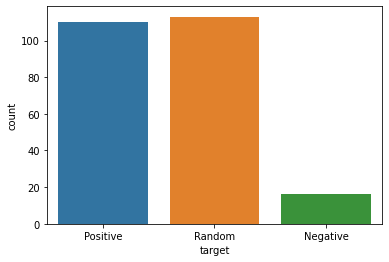

In [ ]:
sns.countplot(df['target'])

In [ ]:
#df['clean_text'] = hero.clean(df['text'], pipeline = custom_pipeline)
df = df[['clean_text','target']].copy()

In [ ]:
df.head()

,clean_text,target
0,se ace en ascard,Positive
1,colt ngsteaight basterainbow,Positive
2,one daywon come ofth clow ju vep ty l beall ma...,Positive
3,keep calmand lovewho wantior,Positive
4,fagm id2ato norm never knowea seareai oesa chia,Positive


In [ ]:
def rettarget(text):
  words = text.split(" ")
  for word in words:
    if word in homophobic_words:
      return 'Negative'

In [ ]:
tfidf,name = hero.tfidf(df['clean_text'],max_features=100,return_feature_names=True)

In [ ]:
len(tfidf[0]),len(name)

(100, 100)

In [ ]:
type(tfidf)

pandas.core.series.Series

In [ ]:
tf_list =[]
for item in tfidf.values:
  tf_list.append(item)

In [ ]:
tf_list = np.array(tf_list)

In [ ]:
tf_list.shape

(239, 100)

In [ ]:
import numpy as np
tfidf_df  = pd.DataFrame(tf_list,columns=name)

In [ ]:
tfidf_df.shape

(239, 100)

In [ ]:
df_train = pd.concat([tfidf_df,df],axis=1)

In [ ]:
df_train.head()

,1am,ad,ae,afraid,al,athlet,away,c,ce,claim,closet,com,come,curv,danger,dat,day,defi,demean,deut,differentfrom,dodg,dss,e,ea,eae,ee,eee,eel,et,even,exist,ff,gay,geckoandfli,gender,human,hyper,indian,instead,...,play,portray,posit,pride,proud,quot,quoteswww,r,rise,said,say,se,see,sin,sorri,sound,space,sport,stand,state,stop,straight,street,subconsci,talk,te,tell,text,theme,thing,time,toward,truth,vers,way,women,yousay,zeigler,clean_text,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,se ace en ascard,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,colt ngsteaight basterainbow,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,one daywon come ofth clow ju vep ty l beall ma...,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,keep calmand lovewho wantior,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fagm id2ato norm never knowea seareai oesa chia,Positive


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb_enc = lb.fit_transform(df_train['target'])

df_train.head()


,1am,ad,ae,afraid,al,athlet,away,c,ce,claim,closet,com,come,curv,danger,dat,day,defi,demean,deut,differentfrom,dodg,dss,e,ea,eae,ee,eee,eel,et,even,exist,ff,gay,geckoandfli,gender,human,hyper,indian,instead,...,play,portray,posit,pride,proud,quot,quoteswww,r,rise,said,say,se,see,sin,sorri,sound,space,sport,stand,state,stop,straight,street,subconsci,talk,te,tell,text,theme,thing,time,toward,truth,vers,way,women,yousay,zeigler,clean_text,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,se ace en ascard,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,colt ngsteaight basterainbow,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,one daywon come ofth clow ju vep ty l beall ma...,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,keep calmand lovewho wantior,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fagm id2ato norm never knowea seareai oesa chia,Positive


In [ ]:
df_train['target'] = lb_enc

In [ ]:
df_train = df_train.drop('clean_text',axis=1)
df_train.head()

,1am,ad,ae,afraid,al,athlet,away,c,ce,claim,closet,com,come,curv,danger,dat,day,defi,demean,deut,differentfrom,dodg,dss,e,ea,eae,ee,eee,eel,et,even,exist,ff,gay,geckoandfli,gender,human,hyper,indian,instead,...,peopl,play,portray,posit,pride,proud,quot,quoteswww,r,rise,said,say,se,see,sin,sorri,sound,space,sport,stand,state,stop,straight,street,subconsci,talk,te,tell,text,theme,thing,time,toward,truth,vers,way,women,yousay,zeigler,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_train.drop('target',axis=1),df_train['target'],test_size=0.2,stratify=df_train['target'],random_state=42)
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score,confusion_matrix

y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.9166666666666666

In [ ]:
lb.classes_

array(['Negative', 'Positive', 'Random'], dtype=object)

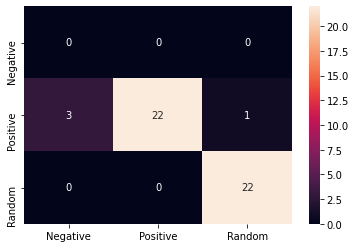

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred,y_test),xticklabels=lb.classes_,yticklabels=lb.classes_,annot=True)

In [ ]:
print(recall_score(y_test,y_pred,average='weighted'))

0.9166666666666666


## Make predictions on test data

In [ ]:
test = pd.read_csv('/content/drive/My Drive/Detect_Sentiments/Data Files/Test.csv')
test.head()

,Filename,Category
0,Test1001.jpg,NaN
1,Test1012.jpg,NaN
2,Test1022.jpg,NaN
3,Test1071.jpg,NaN
4,Test1122.jpg,NaN


In [ ]:
tstimg = test.Filename.values.tolist()

In [ ]:
path_train

'/content/drive/My Drive/Detect_Sentiments/Data Files/Dataset'

In [ ]:
import os
img_txt =[]
image_name = []
polarity =  []
for images in tstimg:
  extractedInformation = pytesseract.image_to_string(Image.open(path_train+'/'+ images))
  text = extractedInformation.encode('utf-8')
  converted_list = []
  for element in extractedInformation.split(" "):
    converted_list.append(element.replace("\n",""))
  img_txt.append(" ".join(converted_list))
  polarity.append(detect_polarity(extractedInformation))
  image_name.append(images)

In [ ]:
test = pd.DataFrame({'Image':image_name,'text':img_txt,'polarity':polarity})

In [ ]:
test['category'] = test['polarity'].apply(detect_category)

In [ ]:
test.head()

,Image,text,polarity,category
0,Test1001.jpg,"When people askwhat I see in you,I just smile ...",0.066667,Positive
1,Test1012.jpg,eSSmee) |aie) alRee,0.000000,Random
2,Test1022.jpg,LOVE®,0.500000,Positive
3,Test1071.jpg,ees MU WALLA OLem eae ienot living by society'...,0.212222,Positive
4,Test1122.jpg,"‘Zeigler, author of ""Fair Play: How LGBT Athle...",0.272222,Positive


In [ ]:
test['clean_text'] = hero.clean(test['text'], pipeline = custom_pipeline)
test.head()

,Image,text,polarity,category,clean_text
0,Test1001.jpg,"When people askwhat I see in you,I just smile ...",0.066667,Positive,peopl askwhat see smile andlook away becausei ...
1,Test1012.jpg,eSSmee) |aie) alRee,0.000000,Random,essme aie alre
2,Test1022.jpg,LOVE®,0.500000,Positive,lover
3,Test1071.jpg,ees MU WALLA OLem eae ienot living by society'...,0.212222,Positive,ee mu walla olem eae ienot live societi sstand...
4,Test1122.jpg,"‘Zeigler, author of ""Fair Play: How LGBT Athle...",0.272222,Positive,zeigler author fair play lgbt athlet claim the...


In [ ]:
tfidf_test,name_test = hero.tfidf(df['clean_text'],max_features=100,return_feature_names=True)

In [ ]:
tf_list_test =[]
for item in tfidf_test.values:
  tf_list_test.append(item)

In [ ]:
tfidf_test  = pd.DataFrame(tf_list_test,columns=name_test)

In [ ]:
tfidf_test .head()

,1am,ad,ae,afraid,al,athlet,away,c,ce,claim,closet,com,come,curv,danger,dat,day,defi,demean,deut,differentfrom,dodg,dss,e,ea,eae,ee,eee,eel,et,even,exist,ff,gay,geckoandfli,gender,human,hyper,indian,instead,...,part,peopl,play,portray,posit,pride,proud,quot,quoteswww,r,rise,said,say,se,see,sin,sorri,sound,space,sport,stand,state,stop,straight,street,subconsci,talk,te,tell,text,theme,thing,time,toward,truth,vers,way,women,yousay,zeigler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pred = lr.predict(tfidf_test)

In [ ]:
pred

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
label_pred = lb.inverse_transform(pred)

In [ ]:
sub = pd.read_csv('/content/drive/My Drive/Detect_Sentiments/Data Files/Sample_Submission.csv')
sub.head()

,Filename,Category
0,Test1001.jpg,Random
1,Test1012.jpg,Positive
2,Test1022.jpg,Negative
3,Test1071.jpg,Random
4,Test1122.jpg,Positive


In [ ]:
test['Category'] = label_pred

In [ ]:
test.head()

,Image,text,polarity,category,clean_text,Category
0,Test1001.jpg,"When people askwhat I see in you,I just smile ...",0.066667,Positive,peopl askwhat see smile andlook away becausei ...,Positive
1,Test1012.jpg,eSSmee) |aie) alRee,0.000000,Random,essme aie alre,Positive
2,Test1022.jpg,LOVE®,0.500000,Positive,lover,Positive
3,Test1071.jpg,ees MU WALLA OLem eae ienot living by society'...,0.212222,Positive,ee mu walla olem eae ienot live societi sstand...,Positive
4,Test1122.jpg,"‘Zeigler, author of ""Fair Play: How LGBT Athle...",0.272222,Positive,zeigler author fair play lgbt athlet claim the...,Positive


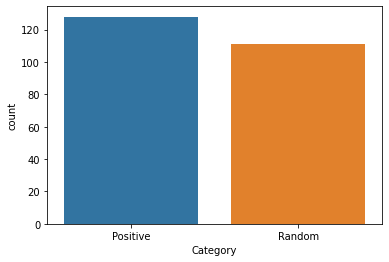

In [ ]:
sns.countplot(test['Category'])

In [ ]:
sub = test[['Image','Category']].copy()

In [ ]:
sub = sub.rename(columns={'Image':'Filename'})
sub.head()

,Filename,Category
0,Test1001.jpg,Positive
1,Test1012.jpg,Positive
2,Test1022.jpg,Positive
3,Test1071.jpg,Positive
4,Test1122.jpg,Positive


In [ ]:
sub.to_csv('sub1.csv',index=False)